# MLOps - Machine Learning DevOps

Production ML combines two key disciplines: ML Development and Modern Software Development. 

Some terms:

| Term | Definition |
| - | - |
| Data Schema | a schema describes standard characteristics of your data such as column data types and expected data value range. |
| Latency | Delay between user's action and response of application to that action. |
| Throughput | Number of successful requests served per unit time, e.g. 1 second. |
| 



# ML project lifecycle

<img src="Media/ml_project_lifecycle.png" width=800>

<u>CI/CD</u>:
- Continuous Integration (CI): testing and validating code, components, data, data schemas, and models. 
- Continuous Delivery (CD): deploying your system as a whole, as a singular working system composed of different components. 
- Continuous Training (CT): automatically retrains ML models for testing and serving. 

---

<u>MLOps maturity level</u> is determined by the level of automation of ML pipelines - Data Collection, Modeling, Deployment, and Maintenance systems. As maturity increases, the velocity of training and deployment also increase. 

The overall goal of MLOps is to automate training and deployment of ML models into the core software system, and provide monitoring.

**Level 0**: Manual Process

- Manual, script-driven, interactive. 
- E.g. data scientists hand over notebooks with the ready ML model to the engineering team to deploy on the infrastructure. 
- Manual handoff
- Less frequent releases, so no CI/CD
- Data science-driven process 

Challenges:
- Need for actively monitoring the quality of your model in production
- Model performance degradation and other model behavioural drifts (with use of tracking and logging) are not implemented
- Retraining your production models with new data
- Continuously experimenting with new implementations to improve the data and model

<img src="Media/MLOps_level0.png">

**Level 1**: ML pipeline automation

- Rapid and orchestrated experimentation: automated experimentation
- Reusable, composable, and shareable components
- Containerised ML model
- ML pipeline in production continuously (automatically) delivers new models that are trained on new data to prediction services
- Some triggers automatically execute the pipeline
- automatic Data Validation to decide if model needs to be re-trained; getting notifications if data schema differs significantly from the production data
- 

<img src="Media/MLOps_level1.png">

**Level 2**: 

still speculative.

<img src="Media/MLOps_level2.png">


## Scoping


Scoping process:
1. **PROBLEM: Brainstorm business problems (not AI problems)**
   1. think about what you want to achieve
   2. "I want to hear your business problems, what needs to be improved business-wise, and it is my job to come up with an AI solution"
   3. "What are the top 3 things you wish were working better?" - e.g, Increase conversion, Reduce inventory, Increase margin (profit per item)
2. **SOLUTION: Brainstorm AI solutions**
   1. now, think about how to achieve it
3. **DILLIGENCE: Access the feasibility and value of potential solutions**
   1. Dilligence on feasibility: is this project technically feasible?
      1. Use external benchmark: literature, other company, competitor
   2. Dilligence on value:
      1. Have technical and business teams try to agree on (performance / error) metrics that both are comfortable with
      2. Fermi estimates - try to estimate how much ML engineer metrics improvements will influence improvement in the business metrics
4. **Determine milestones**
   1. Key specifiecations:
      1. ML metrics: accuracy, precision, recall, etc.
      2. Software metrics: latency, throughput, etc. given compute resources
      3. Business metrics: revenue, etc.
      4. resources needed: data, personnel, help from other teams
      5. timeline
   2. if unsure, consider benchmarking to other projects, or building a PoC (proof-of-concept) first
5. **Budget for resources**


Assessing technical feasibility:

| | Unstructured data | Structured |
| - | - | - |
| New (you haven't worked on that type of project before) | HLP | Predictive features available? Do we have features (past data) that seem predictive of future events? |
| Existing | HLP; history of project (based on data of model error per regular time frames, you could model / estimate what this error will approach in the future) | Identify new predictive features; look at the history of project |




## Data


For production, real-world dynamic data is used. After deployment, model-performance needs to be continuously monitored, and new data, ingested and re-trained.

Garbage in , garbage out.

Key points:
- Translate use needs into data problems.
- Ensure data coverage and high predictive signal
- Source, store, and monitor quality data responsibly
- Data availability and collection
  - what kind of / how much data is available
  - how often does the new data come in
  - is it annotated?

**Data iteration Loop**

<img src="Media/data_iteration_loop.png" width=400>

**Define data and establish baseline**

Major types of data problems

Data structure:
- Unstructured data: images, text, audio. 

| | Unstructured | Structured | *Feature* |
| - | - | - | - |
| **Small data** <br>($n \le 10000$) | Manufacturing visual inspection from 100 training examples | Housing price prediction based on square footage, etc. from 50 training examples. | *Clean labels and label consistency are critical; is possible to manually look through dataset and fix labels* |
| **Big data** <br>($n \gt 10000$)| Speech recognition from 50 million training examples | Online shopping recommendations for 1 milllion users. | *Because too much data, emphasis is on data process, still, label consistency is also important; big data can also have small data challenges, e.g. considering rare events / classes and model performance on then* |
| *Features* | *Obtain more data by data augmentation; humans can label more (and more effectively & efficiently) unstructured data* | *Harder to obtain more data (e.g. by data augmentation); human labelling is also harder.* | |

Improving label consistency:
- **Have multiple labelers label the same example**
- When disagreement, have MLE, subject matter expert, and labelers discuss definitions of y to reach agreement
- Potentially change data points that labelers think doesn't contain enough information to label it
- **standardise the labels**
- **merge classes**: e.g. "deep scratch" and "shallow scratch" -> "scratch"

---

**Label and organise data**

Try to get into the Data Iteration Loop asap. Don't spend initially too much time collecting the data.

You could start with little data, then increase afterwards. Don't increase data by more than 10x at a time, to see if increasing data points leads to improvement. 

Data Pipelines (Cascades):
- E.g. `Raw Data -> Data Cleaning (with scripts) -> ML`
- replicability of data processing programs could be different at different stages of work: 
  - Proof-of-Concept phase, data processing can be manual (with lots of comments) with the sole aim of making stuff work; purpose of PoC system - to check feasibility and help decide if an application is workable and worth deploying. 
  - Production phase, use sophisticated tools to ensure the replicability of the entire data pipeline.
  - What if some stage of data pipeline changes? Need to keep track of the following (by e.g. extensive documentation, use of metadata); two below needed for ML debugging:
    - Data provenance: where it comes from
    - Data lineage: sequence of steps
  - Meta-data can be useful for:
    - Error analysis - spotting unexpected effects
    - keeping track of data provenance

Artifacts - all data and objects produced by the ML pipeline components. 

Data provenance / lineage: sequence of the artifacts that are created as we move through the pipeline. 
- Important for debugging and understanding the ML pipeline.
- Inspecting artifacts at each point in the training process; 
- compare training runs






### Data collection

Data pipeline: a series of data processing steps such as data collection, data ingestion, and data preparation.

Feature engineering: helps to maximise the predictive signal. 

Feature selection: helps to measure the predictive signals. 

Data sources:
- Build synthetic dataset
- Open source dataset
- Web scraping
- Build your own dataset
- Collect live data

---

**Responsible data**

Security and privacy:
- Protect personally identifiable information:
  - Aggregation: replace unique values with summary values
  - Redaction: remove some data to create less complete picture

Fairness:
- Avoid bias in the data, e.g. model doesn't work well on photos of black people compared to white people
- Group fairness, equal accuracy
- Bias in human labeled / collected data, e.g. because of one group being unrepresented 
  - accurate labels: are necessary for supervised learning
  - can arise from the data containing more data points for one group than the other; no representation of people's diversity

Problems:
- Representational harm: the amplification or negative reflection of certain groups' stereotypes.
- Opportunity denial
- Disproportionate product failure
- Harm by disadvantage

Mitigate bias in data:
- Collect data from equal proportions from different user groups








### Data labeling

Labeling can be done by:
- automation
- raters

Types of human raters (people who assign labels for training supervised models):
- Generalists: crowdsourcing tools
- Subject matter experts: specialised tools, e.g. radiologists labeling medical images for automated diagnosis tools
- Your users: derived labels, e.g. tagging photos


<u>Methods of obtaining labels:</u>
- **Process Feedback** (direct labeling):
  - Ex: actual vs predicted click-through - if person clicked on an ad, label as "positive"
  - Advantages: training dataset continuous creation; labels evolve quickly; captures strong label signals
  - Disadvantages: not possible for many problems; tends to be custom design for each problem;
  - Log analysis tools: Logstash, Fluentd, Google Cloud Logging, AWS ElasticSearch, Azure Monitor
- **Human Labeling**
  - Raters labeling data, e.g cardiologists labeling MRI images
  - Advantages: more labels; pure supervised learning;
  - Disadvantages: can be costly and hard depending on data (e.g. X-ray images); quality consistency; slow; expensive; small dataset curation
- **Semi-Supervised Labeling**
- **Active Learning**
- **Weak Supervision**





### Feature eng at scale

Data augmentation:
- Data needs to be augmented for those data points on which the computer performs poorly, but a human does not
- Needs to be still recognisable by a human
- can be done by GANs

Unstructured data:
- Add data
- Data augmentation
  - can be done with GANs

Structured data:
- Add features
  - E.g. restaurant recommendation system, could add feature "is_vegetarian?", "restaurant_has_veg_option?"

---

Challenges in MLOps:
- In real-world data, we could have <u>terabytes of data</u>
- Large-scale data processing frameworks
- Consistent transformations between training and serving is CRUCIAL

Transformations:
- Instance level - can be applied to individual data points without considering the rest of the data points in the dataset: clipping, multiplying, expanding features, feature cross;
  - At serving level
- Full-pass - can be applied to individual data points ONLY when whole dataset is considered: minimax, standard scaling, bucketizing;
  - at training level
  - these transofrmations (instructions) need to be saved off to be used at instance level





## Modelling

**Select and train model**

Model development is a highly-iterative process - **model iteration**.

Baseline level of performance (e.g. desired accuracy) can be established with Human Level Performance (HLP):
- HLP can establish a respectable benchmark of performance to beat 
- HLP usually is more effective for establishing baseline for unstructured data. 
- HLP for unstructured data gives an estimate of the irreducible error (Bayes error, random chance error) and what performance is reasonable to achieve.
- Raising / establishing HLP:
  - When the ground truth label is externally defined (e.g. how you vs the doctor predict some medical outcome compared to a <u>biopsy</u>), HLP gives an estimate for Bayes error / irreducible error;
  - Often ground truth is just label of a human (e.g. an inspector labeling the photos). In this case, low HLP could indicate inconsistent labeling instructions
  - HLP can be raised by making the labeling instructions more consistent
  - If a photo cannot be classified well even by a qualified person, then the quality of the photo(s) needs to be improved


<u>Data-centric vs model-centric AI development</u>
- **Data-centric**: keep the algorithm / code fixed and iteratively improve the data
- **Model-centric**: keep the data fixed and iteratively work to improve / optimise algorithm / model
- *most academic research tends to be model-centric with fixed data as a benchmark.*
- *A reasonable algorithm with good data will often outperform a great algorithm with no so good data*

Before starting train on large dataset, overfit a smaller portion of the dataset just to see that it would work and to find bugs

---

**Perform error analysis**

Error analysis is also an iterative process.

Prioritizing what to work on:
- Check how much room for improvement there is compared to the baseline (e.g. HLP)
- how frequently a category appears
- how easy it is to improve accuracy in a category
- how important it is to improve in a category

Improving performance on specific categories:
- collect more data for that category
- data augmentation
- improve label accuracy / data quality

Skewed datasets
- if it's highly-skewed, instead of accuracy use precision and recall

could check precision, recall, and f1 score for each of the groups / classes



### Optimisation

In online inference models, the most important thing to optimise is latency of predictions. In batch inference - latency. 

Quantisation - transforming a model into an equivalent representation that uses parameters and computations at lower precision. 
- Improves model's execution performance and efficiency
- needs less computational resources
- Reduces model's accuracy 
- e.g. using fewer bits (information about color) per pixel in an image
- quantization shrinks model file size 

Pruning: removing parts of the model that don't contribute to the accuracy of the predictions. 
- E.g. in neural nets, removing some neuron connections 
- Model sparsity: not all neurons are connected. 
- sparse model takes less memory, is more efficient, faster to train
- In the past, pruning was done post-training, removing synapses with small weights (presumably, they have small effect on predictions)



### Experimentation

Stages:
1) Notebooks: experiments are usually done in the notebooks at the early stages of experimentation.
2) Python code:
   - Modular code, not monolithic
   - Collections of interdependent and versioned files
   - tracking runtime parameters (e.g. hyperparameters): using config files; command line

---

What to track?
- tracking experiment metadata: code version, data version, hyperparameters, environment, metrics

Tracking hyperparameters:
- config files: e.g. `.yaml` file

```yaml
data:
    train_path: '/path/to/my/train.csv'
    valid_path: '/path/to/my/valid.csv'

model:
    objective: 'binary'
    metric: 'auc'
    learning_rate: 0.1
    num_boost_round: 200
    num_leaves: 60
    feature_fraction: 0.2
```

- command line + argparse

```powershell
python train_evaluate.py
    --train_path '/path/to/my/train.csv'
    --valid_path '/path/to/my/valid.csv'
    -- objective 'binary'
    -- metric 'auc'
    -- learning_rate 0.1
    -- num_boost_round 200
    -- num_leaves 60
    -- feature_fraction 0.2
```

- Parameters dictionary in `main.py`

```py
TRAIN_PATH = '/path/to/my/train.csv'
VALID_PATH = '/path/to/my/valid.csv'

PARAMS = {'objective': 'binary',
          'metric': 'auc',
          'learning_rate': 0.1,
          'num_boost_round': 200,
          'num_leaves': 60,
          'feature_fraction': 0.2}
```


### Versioning

Software (non-ML) versioning: MAJOR.MINOR.PATCH
- MAJOR: contains incompatible API changes
- MINOR: adds functionality in a backwards compatible manner
- PATCH: makes backwards compatible bug fixes

ML model versioning: MAJOR.MINOR.PIPELINE
- MAJOR: incompatibility in data or target variable
- MINOR: model performance is improved
- PIPELINE: pipeline of model training is changed; iow, when we believe we improved the model's output 



## Deployment

Serving an ML model - making it available to the customer

Deployment pattern:
1) shadow mode deployment: model shadows the humans and runs in parallel; ML system's output is not used for any decisions during this phase. purpose - to monitor how the system is performing compared to human performance. Example: You’ve built a new system for making loan approval decisions. For now, its output is not used in any decision making process, and a human loan officer is solely responsible for deciding what loans to approve. But the system’s output is logged for analysis.
2) Canary deployment: roll out to small fraction (5%) of traffic initially, then monitor system and gradually ramp up traffic. Allows to spot problems with your ML system early on. So you start by rolling out the new model to, let's say, 5% of the users. Then, you can gradually ramp up that number. 
3) blue green deployment: just shift router sending data from old version of the model to the new one. Enables easier way to rollback to the older model

---

<img src="Media/edge.png" width=300>

Inference on the cloud / server, connected with edge device (e.g. mobile):
- Advantages:
  - Lots of compute capacity
  - Scalable hardware
  - Model complexity handled by the server
  - Easy to add new features and update the model
  - Low latency and batch prediction
- Disadvantage:
  - Dependent on network connection
  - Speed of connection

<img src="Media/edge2.png" width=300>

On-device inference:
- Advantages:
  - Improved speed
  - Performance
  - Less network bandwidth needed; can function even when network connection is down
- Disadvantages:
  - less capacity
  - tight resource constraints
  - Less computational power 


<br>
<img src="Media/mlops.png" width=600>
<br>
<img src="Media/degree-of-automation.png" width=500>

Example of partial automation: 

You’re building a healthcare screening system, where you input a patient’s symptoms, and for the easy cases (such as an obvious case of the common cold) the system will give a recommendation directly, and for the harder cases it will pass the case on to a team of in-house doctors who will form their own diagnosis independently. What degree of automation are you implementing in this example for patient care?



### Problems

Model performance decays over time.

Drift and skew:
- Drift: changes in data over time, such as data collected once a day.
- Skew: difference between two static versions, or different sources, such as training set and serving set.

Let's define $P(x)$ - probability density of input (features); $P(y)$ - probability density of output (labels); $P(x,y)$ - joint distribution of features and labels; $P(y|x)$ - probability of output (label) given input (features).



**Concept drift (shift)**: 
- x -> y mapping changes post-deployment, iow after deployment what we want to predict changes, occurs when the patterns the model learned no longer hold, the very meaning of what we're trying to predict evolves. 
- $P_{train}(y|x) \ne P_{serve}(y|x)$, $P_{train}(x) = P_{serve}(x)$

**Concept Emergence**
- new patterns in data distribution that were not present previously

**Model decay / drift / staleness** (SLOW): degradation of model performance over time, due to some model quality metric (accuracy, mean error rate, or some downstream business KPI e.g. click-through rate). reasons for model decay: data quality, data drift, concept drift

**Data drift** (feature drift, population, dataset shift): 

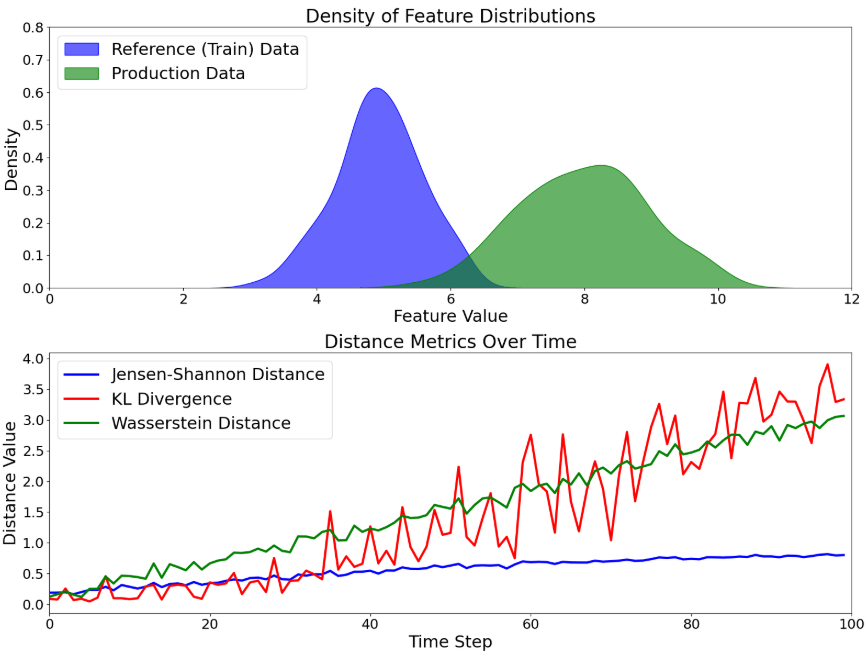

- data (distribution) changes post-deployment, so the trained model is not relevant for this new data. 
- Also could be because instances become increasing for a class for which our model didn't perform that well. Measured by Chebyshev distance (L-infinity)
- $P_{train}(y,x) \ne P_{serve}(y,x)$

<u>Types of dataset shift:</u>
- **Covariate shift**: Data changes, but predicted labels are the same (still correct)
  - $P_{train}(y|x) = P_{serve}(y|x)$, $P_{train}(x) \ne P_{serve}(x)$
- **Prior probability shift**: basically, same as concept shift and the opposite of covariate shift: same data, changed label distribution

Metrics to measure data drift:
- JS (Jensen-Shannon) Distance
  - ℹ️ is best used for interpretability and stable thresholds.
  - 🟢 𝗔𝗱𝘃𝗮𝗻𝘁𝗮𝗴𝗲𝘀:
    - 𝗦𝘆𝗺𝗺𝗲𝘁𝗿𝘆 & 𝗜𝗻𝘁𝗲𝗿𝗽𝗿𝗲𝘁𝗮𝗯𝗶𝗹𝗶𝘁𝘆: Unlike KL Divergence, JS Distance is symmetric and bounded between 0 and 1, making it easier to interpret.
    - A𝘀𝘆𝗺𝗽𝘁𝗼𝘁𝗶𝗰 𝗖𝗼𝗻𝘃𝗲𝗿𝗴𝗲𝗻𝗰𝗲: JS Distance stabilizes because it measures divergence between distributions, bounded between 0 and 1. Once overlap is minimal, further divergence has little impact, ensuring steady monitoring without false alarms.
    - 𝗥𝗲𝘀𝗶𝗹𝗶𝗲𝗻𝗰𝗲 𝘁𝗼 𝗡𝗼𝗶𝘀𝗲: Reduces false alarms caused by minor outliers or fluctuations, making it great for stable monitoring.
  - 🔴 𝗖𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲𝘀:
    - 𝗖𝗼𝗺𝗽𝘂𝘁𝗮𝘁𝗶𝗼𝗻𝗮𝗹 𝗢𝘃𝗲𝗿𝗵𝗲𝗮𝗱: More resource-intensive to compute, especially in high dimensions.
- KL (Kullback-Leibler) Divergence
  - ℹ️ Is best used for early drift detection or highly sensitive systems;
  - 🟢 Advantages:
    - Detect Small Shifts if Required: Captures even minor differences in the distributions, flagging potential early signs of drift.
  - 🔴 𝗖𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲𝘀:
    - 𝗨𝗻𝘀𝘁𝗮𝗯𝗹𝗲 𝗕𝗲𝗰𝗮𝘂𝘀𝗲 𝗼𝗳 𝗦𝗲𝗻𝘀𝗶𝘁𝗶𝘃𝗶𝘁𝘆: Even small changes or outliers in the production data can lead to large KL Div spikes, making it prone to instability and false alarms in real-world scenarios.
- Wasserstein
  - ℹ️ Is used for smooth, robust tracking of distribution shifts
  - 🟢 𝗔𝗱𝘃𝗮𝗻𝘁𝗮𝗴𝗲𝘀:
    - 𝗦𝘁𝗮𝗯𝗶𝗹𝗶𝘁𝘆: Handles even large distributional shifts gracefully without spiking erratically (see the GIF👇)
    - 𝗜𝗻𝗱𝗲𝗽𝗲𝗻𝗱𝗲𝗻𝗰𝗲 𝗳𝗿𝗼𝗺 𝗢𝘃𝗲𝗿𝗹𝗮𝗽: Works seamlessly even when the "Production Data" and "Reference Data" have no overlap.
  - 🔴 𝗖𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲𝘀:
    - 𝗖𝗼𝗺𝗽𝘂𝘁𝗮𝘁𝗶𝗼𝗻𝗮𝗹𝗹𝘆 𝗜𝗻𝘁𝗲𝗻𝘀𝗶𝘃𝗲: Complex to compute, especially for large datasets or in real-time systems.


**Sudden problems**:
  - Data collection problem: bad sensor/camera or moved position, bad log data
  - System problem: bad software update, loss of network connectivity, system down, bad credentials


<img src="Media/skew-detection-workflow.png">

<u>Problems by level of difficulty:</u>
- **Easy problems**: 
  - E.g. classifying dogs and cats.
  - Ground truth changes slowly (months, years)
  - Model retraining driven by:
    - Model improvements, better data
    - Changes in software and / or systems
  - Labeling:
    - curated datasets
    - crowd-based
- **Harder problems**:
  - E.g. shoes
  - Ground truth changes faster (weeks)
  - Model retraining driven by:
    - *Declining model performance*
    - Model improvements, better data
    - Changes in software and/or system
  - Labeling:
    - direct feedback
    - crowd-based
- **Really hard problems**:
  - E.g. predicting financial markets
  - Ground truth changes very fast ()
  - Model retraining driven by:
    - *Declining model performance*
    - Model improvements, better data
    - Changes in software and/or system
  - Labeling:
    - direct feedback
    - weak supervision






## Monitoring

Optimizing metrics of a ML model:
- Accuracy
- Precision
- Recall

Satisficing (gating) metrics of a model:
- (prediction) latency
  - a threshold can be set here (e.g. 200 ms), which can be used to accept or not accept a model
- Model size
  - important when deploying on edge devices
- GPU load
- memory usage
- throughput



how quickly do they change?
- user data generally has slower drift (exception - covid 19, new movie or trend)
- enterprise data (b2b applications) can shift fast (e.g. new coating for mobile phone, change the way the company operates)

<img src="Media/mlops2.png" width=400>

Model maintenance:
- manual retraining
- automatic retraining







# ML pipeline workflows

ML pipeline workflows are almost always DAGs.

TensorFlow Extended (TFX) is an end-to-end platform for deploying production ML pipelines. 

<img src="Media/tfx.png" width=700>

Pipeline:
- ExampleGen: split the data into train and eval set; save the data as `TFRecord` format.
- StatisticsGen: computes statistics for dataset.
- SchemaGen: generates data schema based on the previously-generated statistics.
- ExampleValidator: detects anomalies in your data based on the data schema generated previously.\
- Transform: feature engineering.

**Tensorflow Extended (TFX)**:
- **TensorFlow Data Validation (TFDV)**: helps to understand, validate, and monitor production ML data at scale.
- **TensorFlow Transform**: preprocess and transform data in a scalable and reproducible manner.




## TFDV

TensorFlow Data Validation (TFDV) 
- Generates data statistics and browser visualisations
- Infers the data schema
- Performs validity checks against schema
- Detects training/serving skew

Schema skew: training and serving data do not conform to the same schema, e.g. `int != float`

Feature skew: features values are different between training and serving.

Distribution skew: distribution of serving and training dataset is significantly different. 

Common use-cases include comparing training, evaluation and serving datasets, as well as checking for training/serving skew.

You can then validate new datasets (e.g. the serving dataset from your customers) against this schema to detect and fix anomalies. This helps prevent the different types of skew. That way, you can be confident that your model is training on or predicting data that is consistent with the expected feature types and distribution.

TFDV helps to understand, validate, and monitor production machine learning data at scale. It provides insight into some key questions in the data analysis process such as:

- What are the underlying statistics of my data?
- What does my training dataset look like?
- How does my evaluation and serving datasets compare to the training dataset?
- How can I find and fix data anomalies?

<img src="Media/tfdv-pipe.png" width=600>

Can capture schema of each feature:
- The expected type of each feature;
- The expected presence of each feature - minimum count and fraction of examples that must contain the feature
- Minimum and maximum number of values
- Possible categories for string feature, or range for an integer feature

how you would use Tensorflow Data Validation in a machine learning project.
- It allows you to scale the computation of statistics over datasets.
- You can infer the schema of a given dataset and revise it based on your domain knowledge.
- You can inspect discrepancies between the training and evaluation datasets by visualizing the statistics and detecting anomalies.
- You can analyze specific slices of your dataset.

### 1

In [10]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Evgenii', 'Carolina', 'Rebeca', 'Judi'],
    'age': [26, 28, 25, 50]
})

df2 = pd.DataFrame({
    'name': ['Joel'],
    'age': [100]
})

df

import tensorflow as tf
"""
tensorflow_data_validation has lots of dependency conflicts. What worked:
python==3.9.0
tensorflow-data-validation==1.13.0
protobuf==3.20.0
"""
import tensorflow_data_validation as tfdv

from tensorflow_metadata.proto.v0 import schema_pb2


In [11]:
# Generate training dataset statistics
train_stats = tfdv.generate_statistics_from_dataframe(df)
# Visualize training dataset statistics
tfdv.visualize_statistics(train_stats)

check_stats = tfdv.generate_statistics_from_dataframe(df2)

In [8]:
# Infer schema from the computed statistics.
schema = tfdv.infer_schema(statistics=train_stats)
# Restrict the range of the `age` feature
tfdv.set_domain(schema, 'age', schema_pb2.IntDomain(name='age', min=17, max=90))
# Display the inferred schema
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'name',STRING,required,,'name'
'age',INT,required,,min: 17; max: 90


,Values
Domain,
'name',"'Carolina', 'Evgenii', 'Judi', 'Rebeca'"


In [12]:
# Check evaluation data for errors by validating the evaluation dataset statistics using the reference schema
anomalies =  tfdv.validate_statistics(statistics=check_stats, schema=schema)

# Visualize anomalies
tfdv.display_anomalies(anomalies)

,Anomaly short description,Anomaly long description
Feature name,,
'name',Unexpected string values,Examples contain values missing from the schema: Joel (~100%).
'age',Out-of-range values,Unexpectedly large value: 100.


### 2

In [12]:
import os
import pandas as pd
import tensorflow as tf
import tempfile, urllib, zipfile
import tensorflow_data_validation as tfdv
from tensorflow.python.lib.io import file_io
from tensorflow_data_validation.utils import slicing_util
from tensorflow_metadata.proto.v0.statistics_pb2 import DatasetFeatureStatisticsList, DatasetFeatureStatistics

from sklearn.model_selection import train_test_split


In [10]:
df = pd.read_csv('example_datasets/ML/diabetic_data.csv', header=0, na_values = '?')
# 'readmitted' = label
df.head()

C:\Users\Data Science\AppData\Local\Temp\ipykernel_7396\1716232217.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('example_datasets/ML/diabetic_data.csv', header=0, na_values = '?')


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
len(df)

101766

In [26]:
### Do the 70-15-15 train-val-test split
df_train, df_eval_test = train_test_split(
	df, 
	test_size=0.3, 
	random_state=100 # We fix random_state to make sure we get the same split every time
)
## Now, split the test-validate group into the separate test and validate groups
df_eval, df_serving = train_test_split(
	df_eval_test,
	test_size=0.5, 
	random_state=100
)

print(f'Training dataset has {len(df_train)} records\nValidation dataset has {len(df_eval)} records\nServing dataset has {len(df_serving)} records')

Training dataset has 71236 records
Validation dataset has 15265 records
Serving dataset has 15265 records


In [15]:
### Remove irrelevant features
features_to_remove = {'encounter_id', 'patient_nbr'}

# Collect features to include while computing the statistics
approved_cols = [col for col in df.columns if (col not in features_to_remove)]

# Instantiate a StatsOptions class and define the feature_allowlist property
stats_options = tfdv.StatsOptions(feature_allowlist=approved_cols)

# Review the features to generate the statistics
for feature in stats_options.feature_allowlist:
    print(feature)

race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


In [17]:
### Generate training statistics
train_stats = tfdv.generate_statistics_from_dataframe(df_train, stats_options=stats_options)
### Visualise training statistics
tfdv.visualize_statistics(train_stats)

In [18]:
### Infer data schema
schema = tfdv.infer_schema(statistics=train_stats)
### Display the data schema
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'race',STRING,optional,single,'race'
'gender',STRING,required,,'gender'
'age',STRING,required,,'age'
'weight',STRING,optional,single,'weight'
'admission_type_id',INT,required,,-
'discharge_disposition_id',INT,required,,-
'admission_source_id',INT,required,,-
'time_in_hospital',INT,required,,-
'payer_code',STRING,optional,single,'payer_code'


,Values
Domain,
'race',"'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'"
'gender',"'Female', 'Male', 'Unknown/Invalid'"
'age',"'[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'"
'weight',"'>200', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[25-50)', '[50-75)', '[75-100)'"
'payer_code',"'BC', 'CH', 'CM', 'CP', 'DM', 'FR', 'HM', 'MC', 'MD', 'MP', 'OG', 'OT', 'PO', 'SI', 'SP', 'UN', 'WC'"
'medical_specialty',"'AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric', 'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma', 'Endocrinology', 'Endocrinology-Metabolism', 'Family/GeneralPractice', 'Gastroenterology', 'Gynecology', 'Hematology', 'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine', 'Nephrology', 'Neurology', 'Neurophysiology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 'ObstetricsandGynecology', 'Oncology', 'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics', 'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare', 'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-InfectiousDiseases', 'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'PhysicalMedicineandRehabilitation', 'PhysicianNotFound', 'Podiatry', 'Psychiatry', 'Psychiatry-Addictive', 'Psychiatry-Child/Adolescent', 'Psychology', 'Pulmonology', 'Radiologist', 'Radiology', 'Resident', 'Rheumatology', 'Speech', 'SportsMedicine', 'Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Neuro', 'Surgery-Pediatric', 'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty', 'Urology'"
'max_glu_serum',"'>200', '>300', 'None', 'Norm'"
'A1Cresult',"'>7', '>8', 'None', 'Norm'"
'metformin',"'Down', 'No', 'Steady', 'Up'"


In [19]:
### compare train and eval statistics
### 1. visually
eval_stats = tfdv.generate_statistics_from_dataframe(df_eval, stats_options=stats_options)
tfdv.visualize_statistics(
    lhs_statistics=eval_stats, rhs_statistics=train_stats, 
    lhs_name='EVAL_DATASET', rhs_name='TRAIN_DATASET'
)


In [20]:
### 2. display disparities only

def calculate_and_display_anomalies(statistics, schema):
    '''
    Calculate and display anomalies.

            Parameters:
                    statistics : Data statistics in statistics_pb2.DatasetFeatureStatisticsList format
                    schema : Data schema in schema_pb2.Schema format

            Returns:
                    display of calculated anomalies
    '''
    anomalies = tfdv.validate_statistics(statistics=eval_stats, schema=schema)
    tfdv.display_anomalies(anomalies)

calculate_and_display_anomalies(eval_stats, schema=schema)

,Anomaly short description,Anomaly long description
Feature name,,
'medical_specialty',Unexpected string values,Examples contain values missing from the schema: Proctology (<1%).
'glimepiride-pioglitazone',Unexpected string values,Examples contain values missing from the schema: Steady (<1%).
'miglitol',Unexpected string values,Examples contain values missing from the schema: Up (<1%).


In [23]:
### Fix evaluation anomalies in the schema

# Get the domain associated with the input feature, medical_specialty, from the schema
medical_specialty_domain = tfdv.get_domain(schema, 'medical_specialty')
medical_specialty_domain.value.append('Proctology')

# Get the domain associated with the input feature, glimepiride-pioglitazone, from the schema
glimepiride_pioglitazone_domain = tfdv.get_domain(schema, 'glimepiride-pioglitazone')
glimepiride_pioglitazone_domain.value.append('Steady')

glimepiride_pioglitazone_domain = tfdv.get_domain(schema, 'miglitol')
glimepiride_pioglitazone_domain.value.append('Up')


# Re-calculate and re-display anomalies with the new schema
updated_anomalies = tfdv.validate_statistics(eval_stats, schema)
tfdv.display_anomalies(updated_anomalies)

In [28]:
options = tfdv.StatsOptions(schema=schema, 
                            infer_type_from_schema=True, 
                            feature_allowlist=approved_cols)

serving_stats = tfdv.generate_statistics_from_dataframe(df_serving, stats_options=options)

# HINT: Calculate and display anomalies using the generated serving statistics
calculate_and_display_anomalies(serving_stats, schema=schema)

In [29]:
### Modify the domain
# All the medicines (e.g. metformin, repaglinide, etc.) can have the same defined
# choices for values - 'Down', 'No', 'Steady', 'Up'. However, some of them
# only have few of those due to not being present in the test set. 
# we can expand them by modifying the domain. 
tfdv.display_schema(schema)


,Type,Presence,Valency,Domain
Feature name,,,,
'race',STRING,optional,single,'race'
'gender',STRING,required,,'gender'
'age',STRING,required,,'age'
'weight',STRING,optional,single,'weight'
'admission_type_id',INT,required,,-
'discharge_disposition_id',INT,required,,-
'admission_source_id',INT,required,,-
'time_in_hospital',INT,required,,-
'payer_code',STRING,optional,single,'payer_code'


,Values
Domain,
'race',"'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'"
'gender',"'Female', 'Male', 'Unknown/Invalid'"
'age',"'[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'"
'weight',"'>200', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[25-50)', '[50-75)', '[75-100)'"
'payer_code',"'BC', 'CH', 'CM', 'CP', 'DM', 'FR', 'HM', 'MC', 'MD', 'MP', 'OG', 'OT', 'PO', 'SI', 'SP', 'UN', 'WC'"
'medical_specialty',"'AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric', 'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma', 'Endocrinology', 'Endocrinology-Metabolism', 'Family/GeneralPractice', 'Gastroenterology', 'Gynecology', 'Hematology', 'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine', 'Nephrology', 'Neurology', 'Neurophysiology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 'ObstetricsandGynecology', 'Oncology', 'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics', 'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare', 'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-InfectiousDiseases', 'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'PhysicalMedicineandRehabilitation', 'PhysicianNotFound', 'Podiatry', 'Psychiatry', 'Psychiatry-Addictive', 'Psychiatry-Child/Adolescent', 'Psychology', 'Pulmonology', 'Radiologist', 'Radiology', 'Resident', 'Rheumatology', 'Speech', 'SportsMedicine', 'Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Neuro', 'Surgery-Pediatric', 'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty', 'Urology', 'Neurophysiology', 'Proctology', 'Proctology'"
'max_glu_serum',"'>200', '>300', 'None', 'Norm'"
'A1Cresult',"'>7', '>8', 'None', 'Norm'"
'metformin',"'Down', 'No', 'Steady', 'Up'"


In [30]:
def modify_domain_of_features(features_list, schema, to_domain_name):
    '''
    Modify a list of features' domains.

            Parameters:
                    features_list : Features that need to be modified
                    schema: Inferred schema
                    to_domain_name : Target domain to be transferred to the features list

            Returns:
                    schema: new schema
    '''
    ### START CODE HERE
    # HINT: Loop over the feature list and use set_domain with the inferred schema, feature name and target domain name
    for feature in features_list:
        tfdv.set_domain(schema=schema, feature_path=feature, domain=to_domain_name)
    ### END CODE HERE
    return schema

domain_change_features = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                          'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
                          'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                          'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


# Infer new schema by using your modify_domain_of_features function 
# and the defined domain_change_features feature list
schema = modify_domain_of_features(domain_change_features, schema, 'metformin')

# Display new schema
tfdv.display_schema(schema)



,Type,Presence,Valency,Domain
Feature name,,,,
'race',STRING,optional,single,'race'
'gender',STRING,required,,'gender'
'age',STRING,required,,'age'
'weight',STRING,optional,single,'weight'
'admission_type_id',INT,required,,-
'discharge_disposition_id',INT,required,,-
'admission_source_id',INT,required,,-
'time_in_hospital',INT,required,,-
'payer_code',STRING,optional,single,'payer_code'


,Values
Domain,
'race',"'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'"
'gender',"'Female', 'Male', 'Unknown/Invalid'"
'age',"'[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'"
'weight',"'>200', '[0-25)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[25-50)', '[50-75)', '[75-100)'"
'payer_code',"'BC', 'CH', 'CM', 'CP', 'DM', 'FR', 'HM', 'MC', 'MD', 'MP', 'OG', 'OT', 'PO', 'SI', 'SP', 'UN', 'WC'"
'medical_specialty',"'AllergyandImmunology', 'Anesthesiology', 'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric', 'DCPTEAM', 'Dentistry', 'Dermatology', 'Emergency/Trauma', 'Endocrinology', 'Endocrinology-Metabolism', 'Family/GeneralPractice', 'Gastroenterology', 'Gynecology', 'Hematology', 'Hematology/Oncology', 'Hospitalist', 'InfectiousDiseases', 'InternalMedicine', 'Nephrology', 'Neurology', 'Neurophysiology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 'ObstetricsandGynecology', 'Oncology', 'Ophthalmology', 'Orthopedics', 'Orthopedics-Reconstructive', 'Osteopath', 'Otolaryngology', 'OutreachServices', 'Pathology', 'Pediatrics', 'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare', 'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology', 'Pediatrics-InfectiousDiseases', 'Pediatrics-Neurology', 'Pediatrics-Pulmonology', 'PhysicalMedicineandRehabilitation', 'PhysicianNotFound', 'Podiatry', 'Psychiatry', 'Psychiatry-Addictive', 'Psychiatry-Child/Adolescent', 'Psychology', 'Pulmonology', 'Radiologist', 'Radiology', 'Resident', 'Rheumatology', 'Speech', 'SportsMedicine', 'Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic', 'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial', 'Surgery-Neuro', 'Surgery-Pediatric', 'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty', 'Urology', 'Neurophysiology', 'Proctology', 'Proctology'"
'max_glu_serum',"'>200', '>300', 'None', 'Norm'"
'A1Cresult',"'>7', '>8', 'None', 'Norm'"
'metformin',"'Down', 'No', 'Steady', 'Up'"


In [31]:
### Detect data drift and skew

# Calculate skew for the diabetesMed feature
diabetes_med = tfdv.get_feature(schema, 'diabetesMed')
diabetes_med.skew_comparator.infinity_norm.threshold = 0.03 # domain knowledge helps to determine this threshold

# Calculate drift for the payer_code feature
payer_code = tfdv.get_feature(schema, 'payer_code')
payer_code.drift_comparator.infinity_norm.threshold = 0.03 # domain knowledge helps to determine this threshold

# Calculate anomalies
skew_drift_anomalies = tfdv.validate_statistics(train_stats, schema,
                                          previous_statistics=eval_stats,
                                          serving_statistics=serving_stats)

# Display anomalies
# This one will show drift or skew. It is likely to be a little different from the 
# training data stats. If it's within acceptable limits of difference,
# we can ignore this warning.
tfdv.display_anomalies(skew_drift_anomalies)

## TF Transform

Data Preprocessing can generally be done through these routes:
- Custom scripts: you write your own script for data preprocessing, e.g. using Python, Numpy, Pandas. It is flexible but requires additional effort to ensure consistency between training and serving data preprocessing.
- Data preprocessing within the model: In some cases, preprocessing steps can be included directly within the ML model architecture, simplifying deployment but potentially increasing model complexity and reducing interpretability.
- TensorFlow Transform. 

The primary purpose of `tf.Transform` is to ensure consistency between the preprocessing logic applied during training and the preprocessing applied during serving or inference.

The "Hello World" of TF Transform:
1. Collect raw data
2. Define metadata: datatype of each feature column
3. Create a preprocessing function:
   1. Most important concept
4. Generate a constant graph with the required transformations

Benefits of tf.Transform
- Reproducibility: tf.Transform generates a preprocessing function that ensures the same transformations are applied consistently to both training and serving data.
- Scalability: It efficiently handles large-scale datasets, allowing preprocessing computations to be performed in a distributed and parallelized manner.
- Portability: The transformation graph generated by tf.Transform can be saved and deployed with the ML model, ensuring consistent preprocessing across different environments.

<img src="Media/tf_transform.png" width=600>
<img src="Media/tf_transform2.png" width=600>



In [3]:
rawData = [
    {'x':1, 'y':1, 's':'hello'},
    {'x':2, 'y':2, 's':'world'},
    {'x':3, 'y':3, 's':'hello'}
]

# inspect data and prepare metadata
from tensorflow_transform.tf_metadata import dataset_metadata
from tensorflow_transform.tf_metadata import schema_utils
